<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Data_Understanding_Year_State_District_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding

### Preliminary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


In [ ]:
df_ysdh = pd.read_csv('data/year_state_district_house.csv')

# Basic Info

In [ ]:
df_ysdh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


As we can see, there are **no null entries**.

In [ ]:
len(df_ysdh['state'].unique())

51

In [ ]:
df_ysdh['state'].value_counts()

CALIFORNIA              1196
NEW YORK                 748
TEXAS                    735
FLORIDA                  543
PENNSYLVANIA             497
ILLINOIS                 484
OHIO                     454
MICHIGAN                 385
NEW JERSEY               317
NORTH CAROLINA           292
GEORGIA                  284
VIRGINIA                 256
MASSACHUSETTS            245
INDIANA                  232
TENNESSEE                213
MISSOURI                 213
WASHINGTON               211
WISCONSIN                205
MINNESOTA                192
MARYLAND                 192
LOUISIANA                170
ALABAMA                  168
ARIZONA                  161
COLORADO                 153
KENTUCKY                 152
SOUTH CAROLINA           150
CONNECTICUT              133
OKLAHOMA                 133
IOWA                     122
OREGON                   118
MISSISSIPPI              109
KANSAS                   104
ARKANSAS                  96
WEST VIRGINIA             79
UTAH          

In [ ]:
print(df_ysdh.describe())

               year  congressional_district  candidatevotes    totalvotes
count  10441.000000            10441.000000    1.044100e+04  1.044100e+04
mean    1999.002011                9.873096    1.345276e+05  2.076422e+05
std       13.845898               10.017078    5.160721e+04  8.262643e+04
min     1976.000000                0.000000   -1.000000e+00 -1.000000e+00
25%     1988.000000                3.000000    1.004870e+05  1.554510e+05
50%     2000.000000                6.000000    1.290850e+05  2.004450e+05
75%     2012.000000               13.000000    1.653710e+05  2.555770e+05
max     2022.000000               53.000000    1.165136e+06  2.656104e+06


In [ ]:
# Identify columns with mixed types
mixed_type_cols = df_ysdh.applymap(type).nunique() > 1
mixed_cols = mixed_type_cols.index[mixed_type_cols].tolist()

print("Columns with mixed types:", mixed_cols)

# For each mixed-type column, identify the unique types
for col in mixed_cols:
    unique_types = df_ysdh[col].apply(type).unique()
    print(f"Unique types in column {col}: {unique_types}")

Columns with mixed types: []


## Syntactic And Semantic Accuracy

### Year

In [ ]:
condition = df_ysdh['candidatevotes'] < 1
print(f"Dataframe has {len(df_ysdh[condition])} entries for which 'candidatevotes < 1'.")
df_ysdh = df_ysdh[df_ysdh['candidatevotes'] >= 1]

Dataframe has 2 entries for which 'candidatevotes < 1'.


In [ ]:
condition = df_ysdh['totalvotes'] < 1
print(f"Dataframe has {len(df_ysdh[condition])} entries for which 'totalvotes < 1'.")
df_ysdh = df_ysdh[df_ysdh['totalvotes'] >= 1]

Dataframe has 0 entries for which 'totalvotes < 1'.


In [ ]:
df_ysdh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10439 non-null  int64 
 1   state                   10439 non-null  object
 2   congressional_district  10439 non-null  int64 
 3   party                   10439 non-null  object
 4   candidatevotes          10439 non-null  int64 
 5   totalvotes              10439 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 570.9+ KB


In [ ]:
condition = df_ysdh['totalvotes'] < df_ysdh['candidatevotes']
print(f"Dataframe has {len(df_ysdh[condition])} entries for which 'totalvotes < candidatevotes'.")
df_ysdh = df_ysdh[df_ysdh['totalvotes'] >= df_ysdh['candidatevotes']]

Dataframe has 0 entries for which 'totalvotes < candidatevotes'.


In [ ]:
df_ysdh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10439 non-null  int64 
 1   state                   10439 non-null  object
 2   congressional_district  10439 non-null  int64 
 3   party                   10439 non-null  object
 4   candidatevotes          10439 non-null  int64 
 5   totalvotes              10439 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 570.9+ KB


In [ ]:
numerical_fields = ['candidatevotes', 'totalvotes']

In [ ]:
def convert_states(x: str):
  return x.title() if x != 'DISTRICT OF COLUMBIA' else 'District of Columbia'

In [ ]:
df_ysdh['state'] = df_ysdh['state'].apply(convert_states)

In [ ]:
df_ysdh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10439 non-null  int64 
 1   state                   10439 non-null  object
 2   congressional_district  10439 non-null  int64 
 3   party                   10439 non-null  object
 4   candidatevotes          10439 non-null  int64 
 5   totalvotes              10439 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 570.9+ KB


In [ ]:
df_ysdh['state'].value_counts()

California              1196
New York                 748
Texas                    735
Florida                  541
Pennsylvania             497
Illinois                 484
Ohio                     454
Michigan                 385
New Jersey               317
North Carolina           292
Georgia                  284
Virginia                 256
Massachusetts            245
Indiana                  232
Tennessee                213
Missouri                 213
Washington               211
Wisconsin                205
Minnesota                192
Maryland                 192
Louisiana                170
Alabama                  168
Arizona                  161
Colorado                 153
Kentucky                 152
South Carolina           150
Connecticut              133
Oklahoma                 133
Iowa                     122
Oregon                   118
Mississippi              109
Kansas                   104
Arkansas                  96
West Virginia             79
Utah          

In [ ]:
df_ysdh['party'].value_counts()

DEMOCRAT                   5512
REPUBLICAN                 4856
DEMOCRATIC-FARMER-LABOR      58
INDEPENDENT                  10
INDEPENDENT-REPUBLICAN        2
FOGLIETTA (DEMOCRAT)          1
Name: party, dtype: int64

## Data Visualization

<Axes: xlabel='year', ylabel='count'>

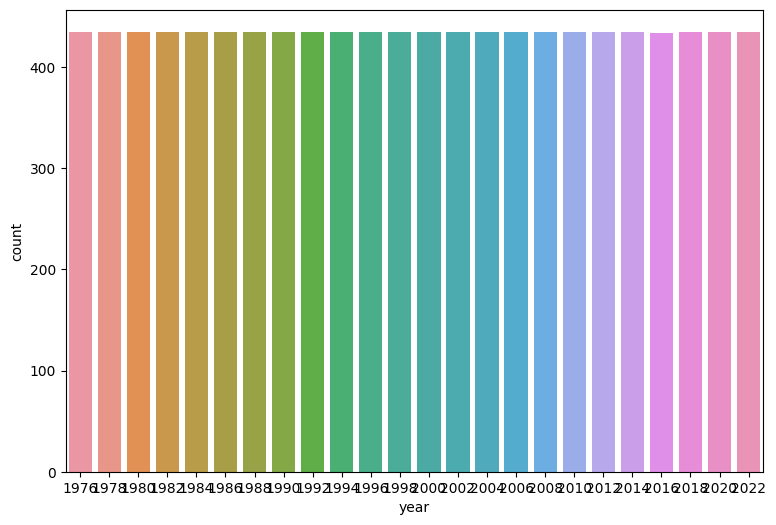

In [ ]:
plt.figure(figsize=(9, 6))
sn.countplot(data=df_ysdh, x='year')

<Axes: ylabel='Frequency'>

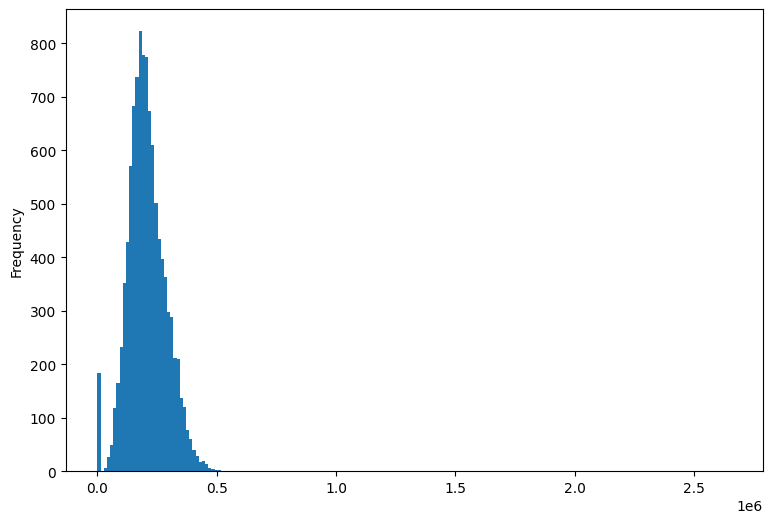

In [ ]:
plt.figure(figsize=(9, 6))
df_ysdh['totalvotes'].plot(kind='hist', bins=200)

<Axes: ylabel='Frequency'>

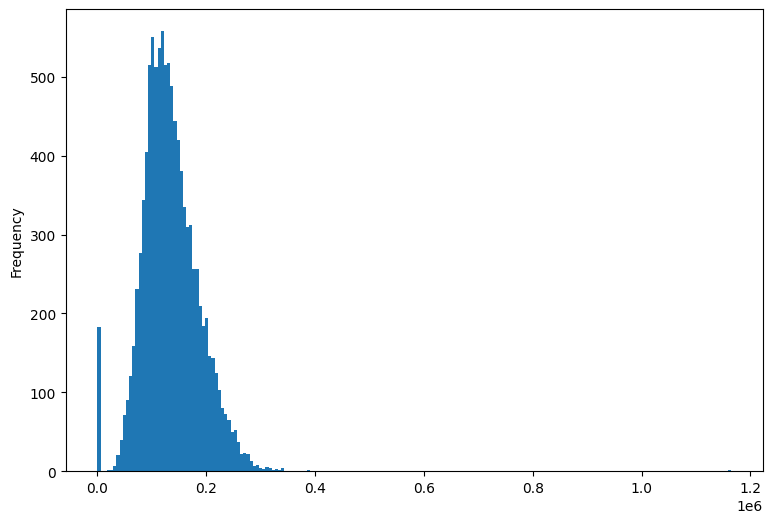

In [ ]:
plt.figure(figsize=(9, 6))
df_ysdh['candidatevotes'].plot(kind='hist', bins=200)

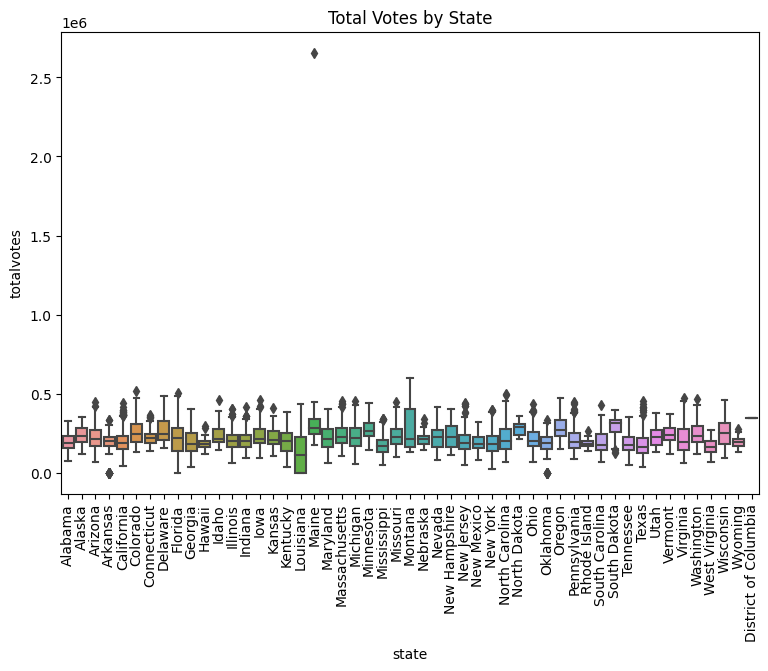

In [ ]:
plt.figure(figsize=(9,6))
sn.boxplot(data=df_ysdh, x='state', y='totalvotes')
plt.xticks(rotation=90)
plt.title('Total Votes by State')
plt.show()

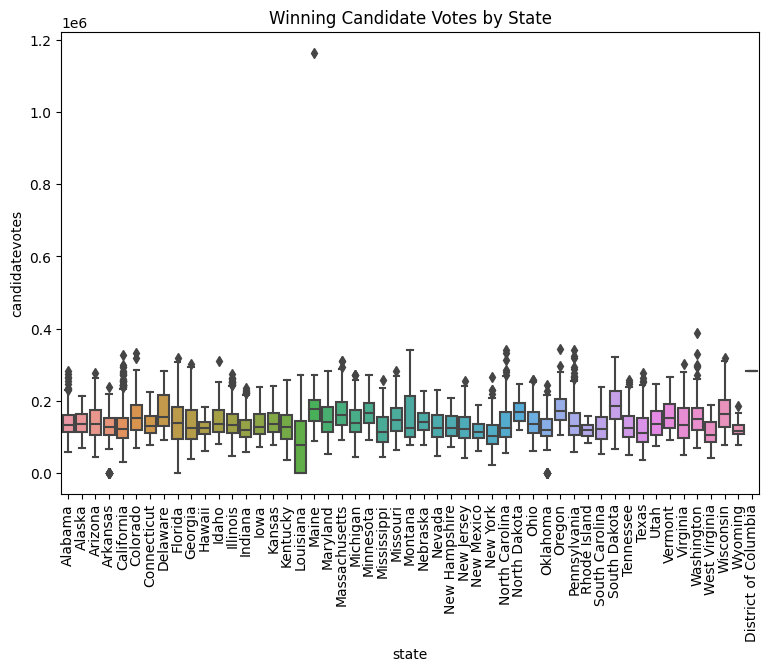

In [ ]:
plt.figure(figsize=(9,6))
sn.boxplot(data=df_ysdh, x='state', y='candidatevotes')
plt.xticks(rotation=90)
plt.title('Winning Candidate Votes by State')
plt.show()

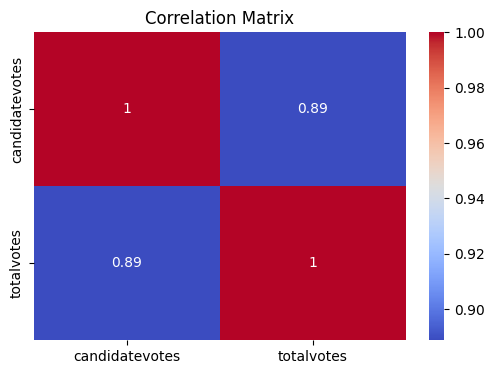

In [ ]:
# 4. Discover new or confirm expected dependencies or correlations between attributes
correlation_matrix = df_ysdh[numerical_fields].corr()
plt.figure(figsize=(6,4))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df_ysdh.to_csv('data/year_state_district_house_data_understanding.csv')